In [494]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [495]:
ethData = pd.read_csv("../Data/HistoricalCryptos/ETH.csv")
btcData = pd.read_csv("../Data/HistoricalCryptos/BTC.csv")
dogeData = pd.read_csv("../Data/HistoricalCryptos/DOGE.csv")

In [496]:
ethData["returns"] = (ethData["close"]-ethData["close"].shift(1))/ethData["close"].shift(1)
btcData["returns"] = (btcData["close"]-btcData["close"].shift(1))/btcData["close"].shift(1)
dogeData["returns"] = (dogeData["close"]-dogeData["close"].shift(1))/dogeData["close"].shift(1)

In [497]:
#clip the data to reduce outlier influence
ethData['returns'] = ethData['returns'].clip(-0.15,0.15)
btcData['returns'] = btcData['returns'].clip(-0.15,0.15)
dogeData['returns'] = dogeData['returns'].clip(-0.15,0.15)

In [498]:
# Ensure the 'date' column is in datetime format for both DataFrames
ethData['date'] = pd.to_datetime(ethData['date'])
btcData['date'] = pd.to_datetime(btcData['date'])
dogeData['date'] = pd.to_datetime(dogeData['date'])

In [499]:
# Rename columns to include the currency prefix
ethData = ethData.rename(columns=lambda x: f"eth_{x}" if x != 'date' else 'date')
btcData = btcData.rename(columns=lambda x: f"btc_{x}" if x != 'date' else 'date')
dogeData = dogeData.rename(columns=lambda x: f"doge_{x}" if x != 'date' else 'date')

In [500]:
# Merge the two DataFrames on the 'date' column
from functools import reduce
# List of DataFrames to merge
dfs = [btcData, ethData, dogeData]
# Merge all DataFrames on the 'date' column using reduce
combined_data = reduce(lambda left, right: pd.merge(left, right, on='date', how='outer'), dfs)

combined_data.head()

,btc_ticker,date,btc_open,btc_high,btc_low,btc_close,btc_returns,eth_ticker,eth_open,eth_high,eth_low,eth_close,eth_returns,doge_ticker,doge_open,doge_high,doge_low,doge_close,doge_returns
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,0.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,-0.058714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,-0.075000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,0.059807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [501]:
# Sort the combined DataFrame by date
combined_data = combined_data.sort_values(by='date').reset_index(drop=True)

In [502]:
# Define the start date
start_date = '2016-07-02'

# Filter the DataFrame to include only rows with date >= start_date
filtered_data = combined_data[combined_data['date'] >= start_date].reset_index(drop=True)
filtered_data.head()

,btc_ticker,date,btc_open,btc_high,btc_low,btc_close,btc_returns,eth_ticker,eth_open,eth_high,eth_low,eth_close,eth_returns,doge_ticker,doge_open,doge_high,doge_low,doge_close,doge_returns
0,BTC,2016-07-02,674.57,700.46,671.46,698.06,0.034822,ETH,12.23,12.30,11.87,12.04,-0.015536,DOGE,0.000294,0.000298,0.000280,0.000298,0.013605
1,BTC,2016-07-03,698.06,701.49,644.61,661.64,-0.052173,ETH,12.04,12.15,11.56,11.85,-0.015781,DOGE,0.000298,0.000298,0.000290,0.000298,0.000000
2,BTC,2016-07-04,661.64,679.03,644.04,675.16,0.020434,ETH,11.85,11.88,10.67,11.34,-0.043038,DOGE,0.000298,0.000299,0.000285,0.000299,0.003356
3,BTC,2016-07-05,675.16,679.19,657.31,663.67,-0.017018,ETH,11.34,11.41,8.98,10.45,-0.078483,DOGE,0.000299,0.000300,0.000299,0.000300,0.003344
4,BTC,2016-07-06,663.67,678.39,662.24,672.70,0.013606,ETH,10.45,11.07,10.16,10.51,0.005742,DOGE,0.000300,0.000300,0.000299,0.000299,-0.003333


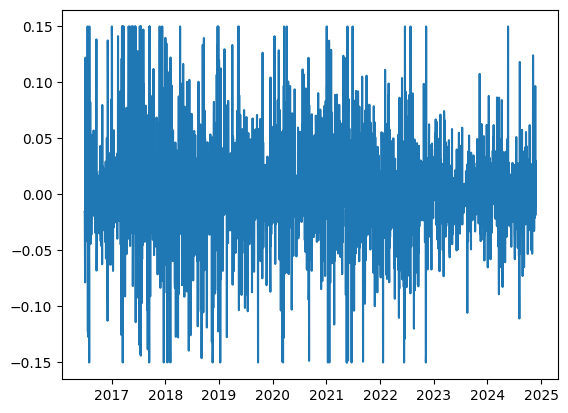

In [503]:
plt.plot(filtered_data['date'], filtered_data['eth_returns'])

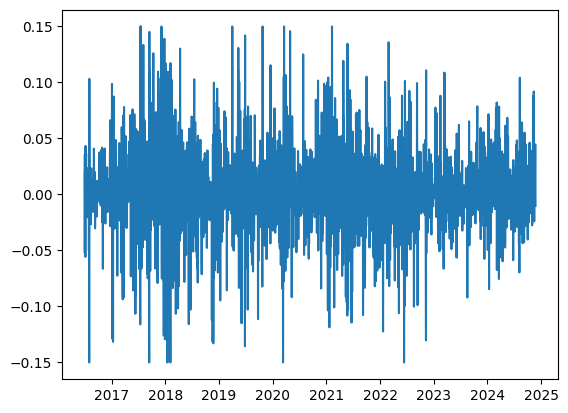

In [504]:
plt.plot(filtered_data['date'], filtered_data['btc_returns'])

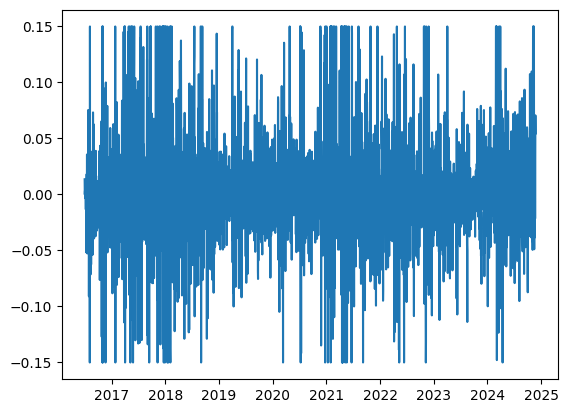

In [505]:
plt.plot(filtered_data['date'], filtered_data['doge_returns'])

In [506]:
returnsData = filtered_data[['btc_returns', 'eth_returns', 'doge_returns']]
print(returnsData.head())
X = returnsData.shift(1)
y = returnsData['eth_returns'].clip(-0.15,0.15)

   btc_returns  eth_returns  doge_returns
0     0.034822    -0.015536      0.013605
1    -0.052173    -0.015781      0.000000
2     0.020434    -0.043038      0.003356
3    -0.017018    -0.078483      0.003344
4     0.013606     0.005742     -0.003333


In [507]:
X = X.dropna()
y = y.loc[X.index]  # Align y to the indices of X
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [624]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as no
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
	("scale", RobustScaler()),
	("model", MLPRegressor(alpha=0.001))
])



In [625]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scale', RobustScaler()),
                ('model', MLPRegressor(alpha=0.001))])

In [626]:
y_pred = pipe.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Returns')

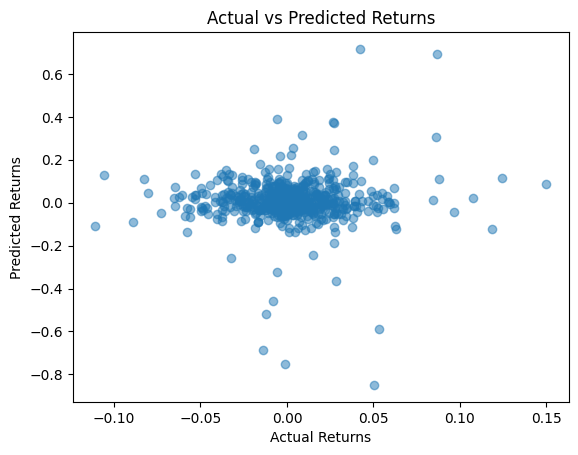

In [627]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs Predicted Returns")

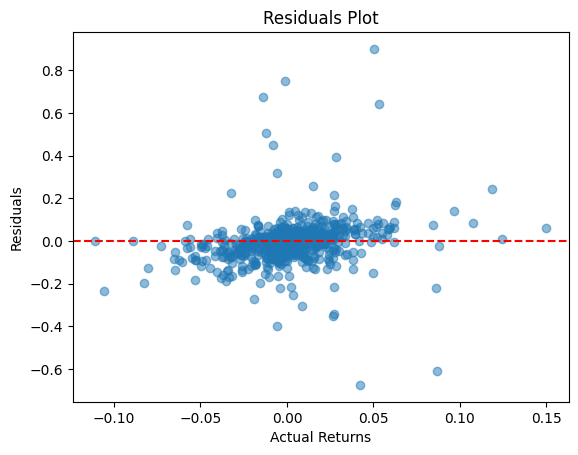

In [628]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Returns")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

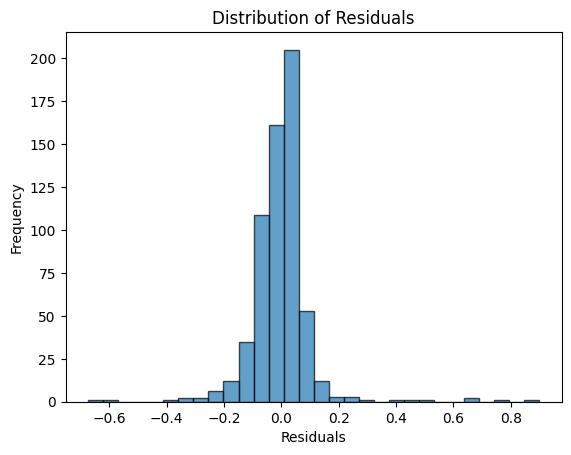

In [629]:
# Histogram of residuals
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

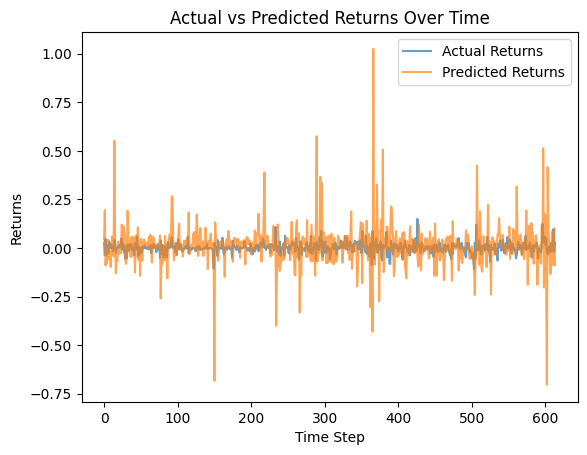

In [623]:
# Line plot for actual and predicted values
plt.plot(y_test.reset_index(drop=True), label="Actual Returns", alpha=0.7)
plt.plot(y_pred, label="Predicted Returns", alpha=0.7)
plt.xlabel("Time Step")
plt.ylabel("Returns")
plt.title("Actual vs Predicted Returns Over Time")
plt.legend()
plt.show()
